In [1]:
# Goal is to maximise similarity of observations within clusters and minimising differences between clusters

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

# Pandas library is used for importing various file types e.g. csv, excel, json.
# also used for manipulation and cleaning dataframes.

# Numpy library has functions used for working with arrays and matrices
# faster, clearer and better quality code using Numpy

# Matplotlib is a 2D plotting library for visualising data in Python

# Seaborn is used for improving Matplotlib visualisations to make them more visually attractive.
# It builds on top of MatPlotLib and works with Pandas for data structures

# SKLearn (formerly called SciKitLearn) is one of the most useful libraries for ML (Machine Learning)
# It contains tools for statistical modelling including classification, regression, clustering and dimensionality reduction.
# It is built on top of Numpy, Scipy and Matplotlib

# KMeans is a clustering method that separates data into clusters with observations belonging to the cluster with
# the nearest mean on a Euclidean scale. In Python it is a module used within the library SKLearn.

In [2]:
data = pd.read_csv('3.01.+Country+clusters.csv')

In [3]:
data
# importing and displaying the data from a csv file

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


### Map the data

In [4]:
data_mapped = data.copy()
data_mapped['Language']=data_mapped['Language'].map({'English':0, 'French':1, 'German':2})
data_mapped
# Giving the languages numerical identification for further analysis

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


### Select the Features

In [5]:
x = data_mapped.iloc[:,1:4]
x
# Selecting 3 features to cluster based on (latitude, longitude and language)

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


### Clustering

In [6]:
kmeans = KMeans(3)
# the k value (in brackets) is number of clusters we want to make (can be changed and re-run later)

In [7]:
kmeans.fit(x)
# this code applies k-means clustering with 3 clusters to x ( the countries in this case)

KMeans(n_clusters=3)

### Clustering Results

In [8]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters
# This clusters the data points into 3 clusters based on the kmeans algorithm

array([1, 1, 0, 0, 0, 2])

In [9]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters
# Identifies which countries are in which clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


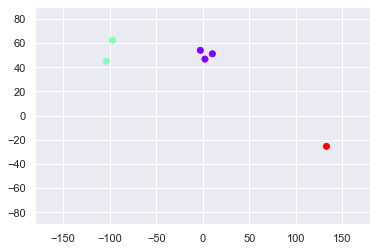

In [10]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()
# Using matplotlib to visualise the countries in their clusters

## Selecting the number of clusters
### WCSS

In [11]:
kmeans.inertia_

290.10523333333333

In [12]:
# Inertia can be recognized as a measure of how internally coherent clusters are (WCSS)

In [13]:
wcss=[]

for i in range (1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
# a way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares (WCSS)
# WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids (local means)
# the code iterates the kmeans algorithm over the dataset for different numbers of clusters (1-6)
# the point is to minimise WCSS with as few clusters as possible.

In [14]:
wcss
# shows wcss for each cluster 1-6 below
# the sequence is decreasing with very big leaps in the first 2 steps

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

### The Elbow Method

Text(0, 0.5, 'Within-Cluster Sum of Squares')

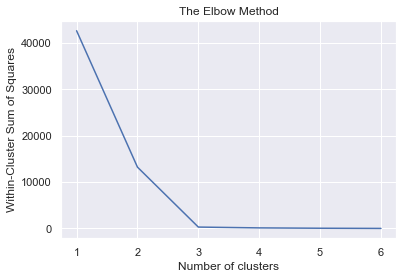

In [15]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares')
# using the matplotlib library to plot a graph of the elbow method.
# the elbow method is used to find the optimal number of clusters to put data in
# here we can see that up to 3 cluster iterations drastically decreases the WCSS. Any further than 3
# clusters doesn't provide any significant further reduction in the WCSS. Therefore the optimal number of clusters
# to use here is 3.